# Wai Yu Amanda, Ng
## Student number: 1008217350
## UTORid: ngwai11
## email: waiyuamanda.ng@mail.utoronto.ca

In [79]:
# Import packages
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; 
from scipy.stats import bernoulli; import random

# Set seed
random.seed(365)

For coding purposes, we will name "Red" as game 0, "Blue" as game 1 and "Other" as game 2.

In [80]:
# Number of games
nb_games = 3  
# True probability of winning for each game
theta_games = [0.35, 0.45, 0.6]

Simulate data using bernoulli models with parameters specified by p_games. Suppose game i is chosen, we define "pull" function which generates a result of success/ fail. The function returns 1 if success and 0 otherwise.

In [81]:
def pull(i):
     return bernoulli.rvs(theta_games[i], size=1).item()

We define a plotting function to plot the beta prior distributions of each game at step 1, 100, 500, 1000.

In [82]:
# Define plotting functions
# Iterations to plot
plots = [1, 100, 500,1000]


def plot(priors, step, ax):
    """Plot the priors for the current step."""
    parameter_domain = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(parameter_domain)
        p = ax.plot(parameter_domain, y)
    ax.set_title(f'Beta prior distributions at step {step:d}')

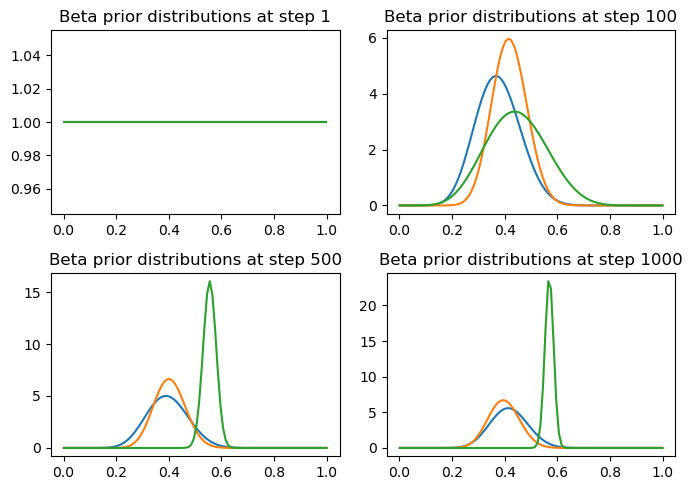

In [83]:
# Setup plot
fig, axs = plt.subplots(2, 2, figsize=(7, 5))
axs = axs.flat

# Simulate multi-armed bandit process and update posteriors

# Initially, each game has 0 trials and success
trials = [0, 0, 0]  # Number of times we tried for each game
success = [0, 0, 0]  # Number of successes for each game

# Run the simulation 1000 times, i.e. we play 1000 games.
n = 1000

for step in range(1, n+1):
    # Beta distribution prior based on current observations
    games_priors = [
        stats.beta(a=1+s, b=1+t-s) for t, s in zip(trials, success)]
    # plot prior 
    if step in plots:
        plot(games_priors, step, next(axs))
    # Sampling theta values from the posterior distribution
    theta_samples = [
        d.rvs(1) for d in games_priors
    ]
    # Choose the game with highest probability of success (theta) by comparing the values of each triplet
    chosen_games = np.argmax(theta_samples)
    # Pull the chosen game and obtain and success/fail in this game
    x = pull(chosen_games)
    # Update trials and success (hence posterior)
    trials[chosen_games] += 1
    success[chosen_games] += x
    
plt.tight_layout()
plt.show()

As shown above, we have the plots of prior distirbutions for each game. 
The blue lines denote prior distirbutions of Game0 (i.e. "Red").
The orange lines denote prior distirbutions of Game1 (i.e. "Blue ).
The green lines denote prior distirbutions of Game2 (i.e. "Other").

# What's the data? 

The data is success/fail of games pulled. This was done by first sampling a theta (probability of success) from the prior of each game and then pulled the game with the highest sampled theta to produce a success/fail outcome using a bernoulli model with probability defined as the sampled theta.


# What's the update for the posterior in question? 

In lecture, we shown that a beta-binomial bayesian model produces a beta posterior distribution as well. 
The update for the posterior is done through updating number of trials and success for each game which determines the parameters in the posterior distribution (alpha and beta)



In [85]:
for i in range(nb_games):
    print((f'Game{i} was pulled {trials[i]:d} times.'))

Game0 was pulled 46 times.
Game1 was pulled 66 times.
Game2 was pulled 888 times.


# Which one of the three choices will you try out? 

We will try out "Other" (i.e. game 2).

# How will you choose?
## What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? 

We notice that in 1000 simulations, "Other" (i.e. game 2) has the largest number of trials. In repeatedly sampling theta values from the posterior distribution while comparing the values of each triplet, theta values from "Others" are always the maximum among the triplet, which is shown by its largest number of trials. Thereby, we learn that "Other" game probably has a higher probability of success (theta) than other two games. 

## If you know the chances that A, B, and C are the best choice, how could you balance exploration versus exploitation when choosing which of the possible options to collect the next data point on next?
 
For each game, we sampled a theta (probability of success) from the prior and pulled the game with the highest sampled theta. We started with the prior Beta(1,1), which corresponds to a uniform prior between 0 and 1. The simulation to generate data is simulated for 1000 steps. The algorithm converges to select the game with the highest probability of winning (Game2).